1. Linear Regression with One Variable PPE: MSE = 62.18924122454346, R-squared = 0.02569331885074344
2. Linear Regression with Two Variables PPE and NHR: MSE = 62.147796490901534, R-squared = 0.026342625388187546


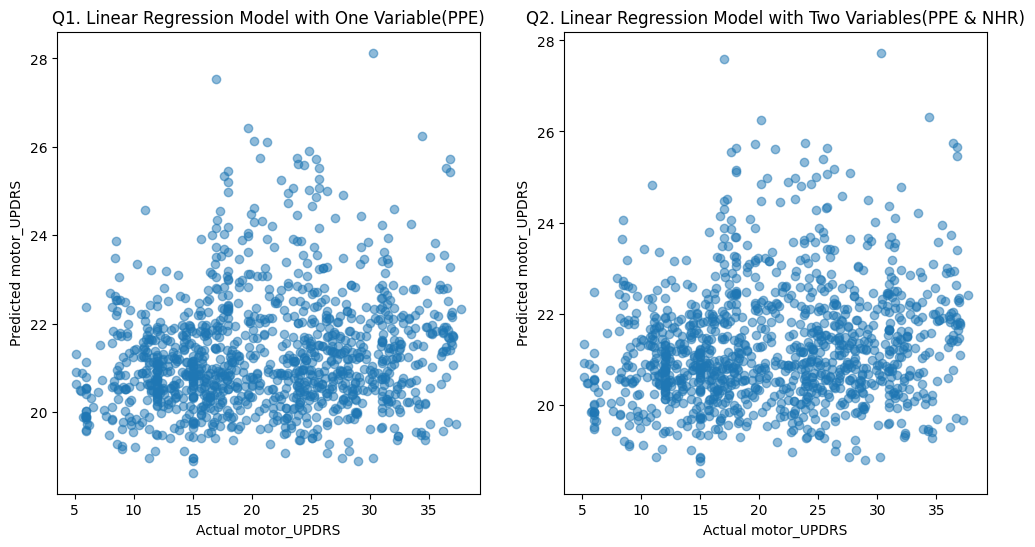

3a Procedding for Forward stepwise linear regression
Added age. New MSE: 59.70306663654948, New R2: 0.0646437299490229
Added subject#. New MSE: 57.15138753404598, New R2: 0.1046203874667051
Added sex. New MSE: 56.06809101801905, New R2: 0.12159218214449918
Added DFA. New MSE: 55.336468812233775, New R2: 0.1330543641737023
Added PPE. New MSE: 54.20474850133896, New R2: 0.1507848049764109
Added Jitter(Abs). New MSE: 53.88629300916038, New R2: 0.15577398489835226
Added test_time. New MSE: 53.63085203370302, New R2: 0.15977592870932078
Added Jitter:DDP. New MSE: 53.38163644685596, New R2: 0.16368034057430758
Added NHR. New MSE: 53.265122029829904, New R2: 0.16550574916144256
Added HNR. New MSE: 53.044471322016584, New R2: 0.16896264065247402
Added Jitter:RAP. New MSE: 52.96096311240507, New R2: 0.17027094744241456
Added Jitter(%). New MSE: 52.932519928405576, New R2: 0.17071656124406553
Added RPDE. New MSE: 52.927857106339324, New R2: 0.17078961276556193
Added Jitter:PPQ5. New MSE: 52.9264

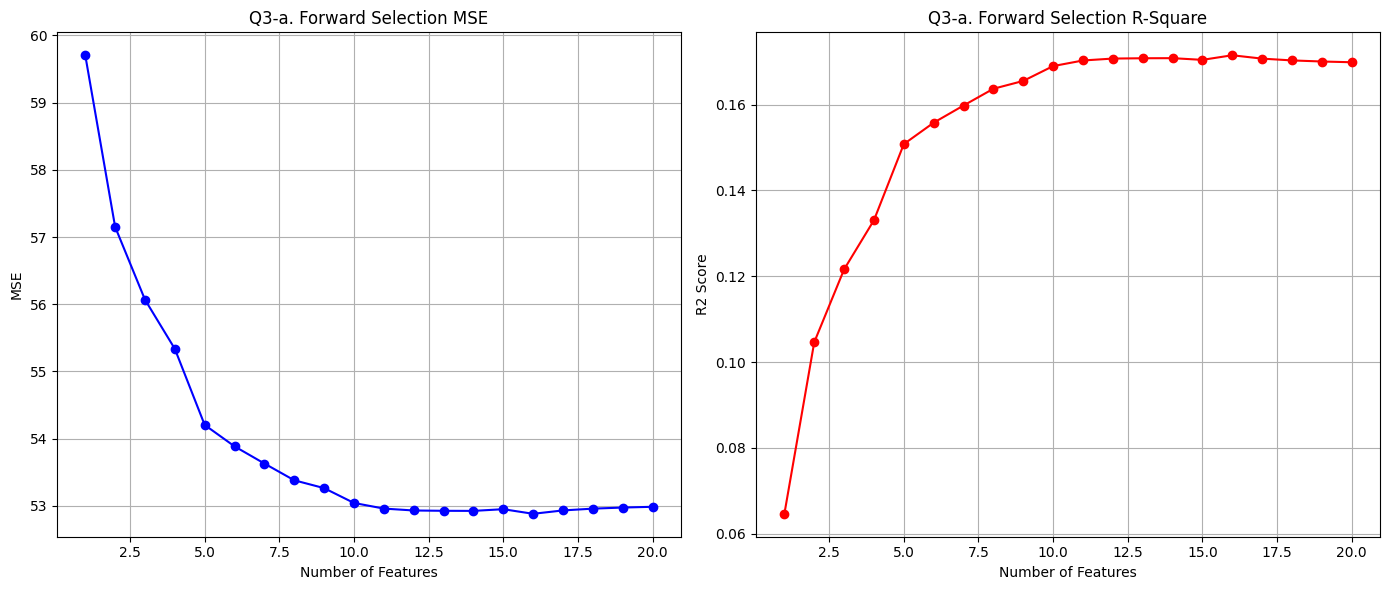

3b Proceeding with Backward stepwise linear regression
Removed subject#. MSE: 56.06074074449689, R2: 0.12170733744242368
Removed age. MSE: 58.27691495396454, R2: 0.08698696947590068
Removed DFA. MSE: 60.26289714133695, R2: 0.05587297490545873
Removed Jitter(Abs). MSE: 61.28600130632325, R2: 0.03984420202079475
Removed Shimmer:APQ11. MSE: 61.78754798939505, R2: 0.031986568214639854
Removed test_time. MSE: 62.181998138784586, R2: 0.025806794858941218
Removed PPE. MSE: 62.36048117183072, R2: 0.023010536082591848
Removed Shimmer(dB). MSE: 62.60347245640658, R2: 0.01920363914412493
Removed Shimmer. MSE: 62.75768822209984, R2: 0.01678757089992522
Removed RPDE. MSE: 62.81343973669434, R2: 0.01591412282299043
Removed HNR. MSE: 62.91314033382892, R2: 0.014352133064150063
Removed sex. MSE: 63.06539035198851, R2: 0.011966861802158224
Removed Jitter(%). MSE: 63.164998824950125, R2: 0.010406315334720806
Removed Shimmer:APQ5. MSE: 63.21057873714713, R2: 0.009692223763489105
Removed Jitter:PPQ5. MSE:

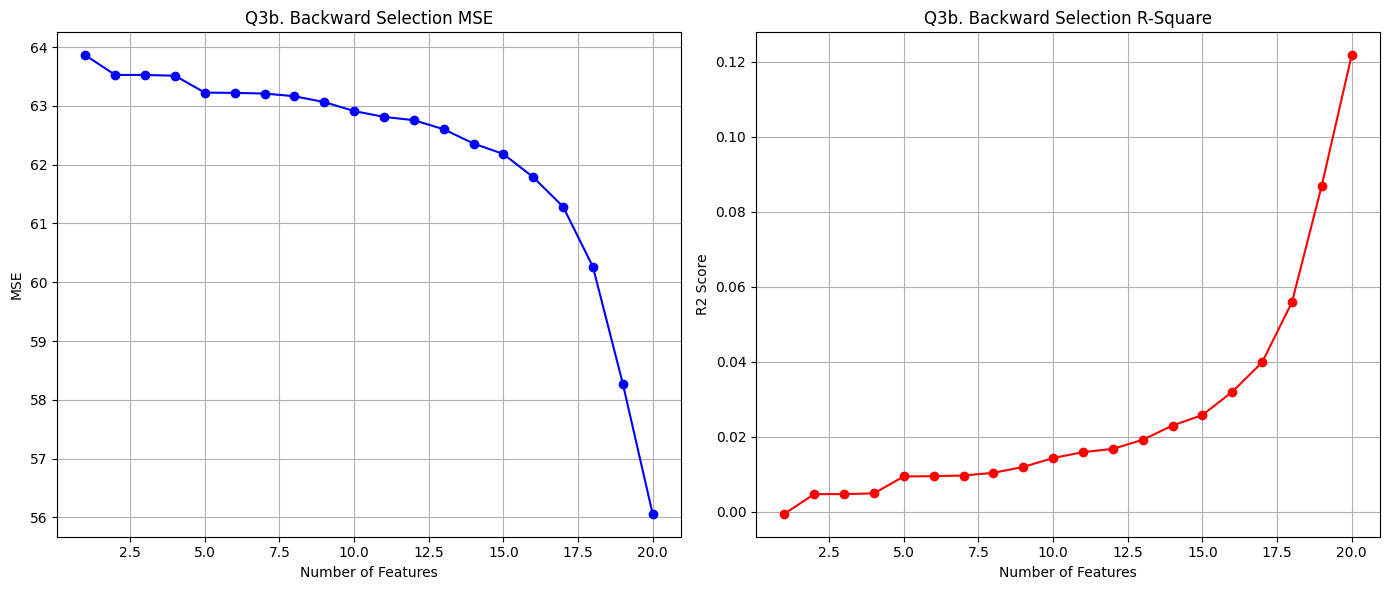

3c comparing Forward & Backward
Forward Selection Final MSE: 63.86202040564551
Backward Elimination Final MSE: 63.86202040564551
Forward Selection Final R2: 0.16985842509202365
Backward Elimination Final R2: -0.0005137854673569198


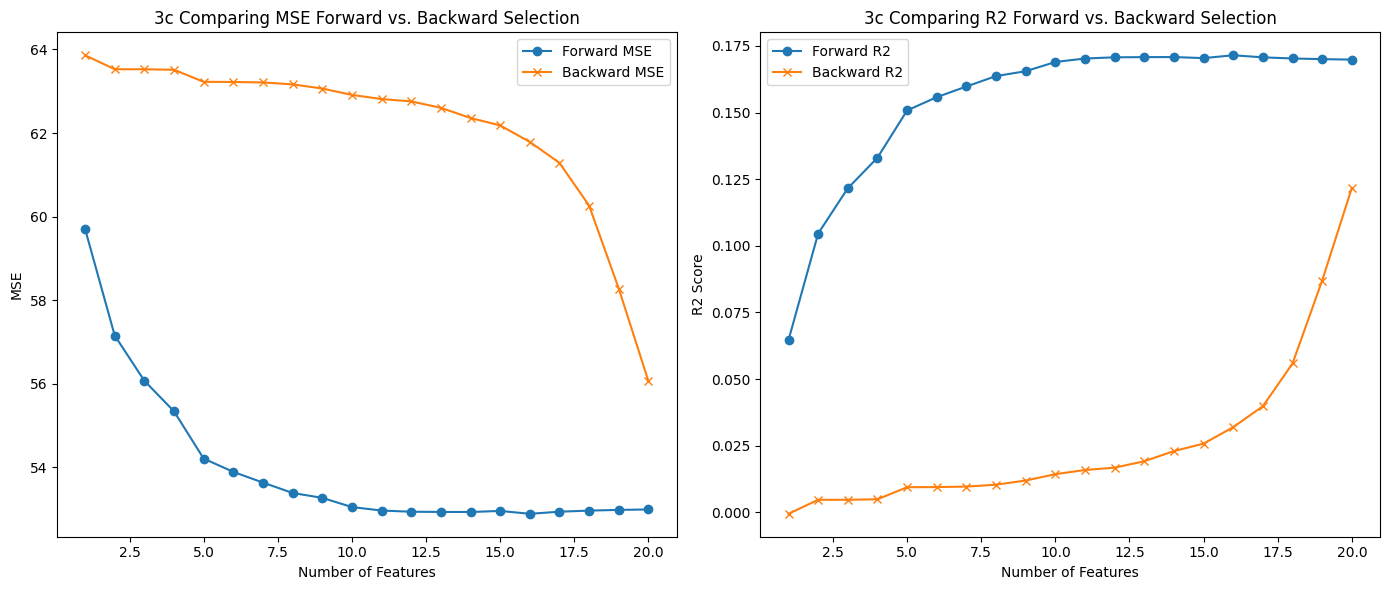

3d Comparing Q2 with best of Q3


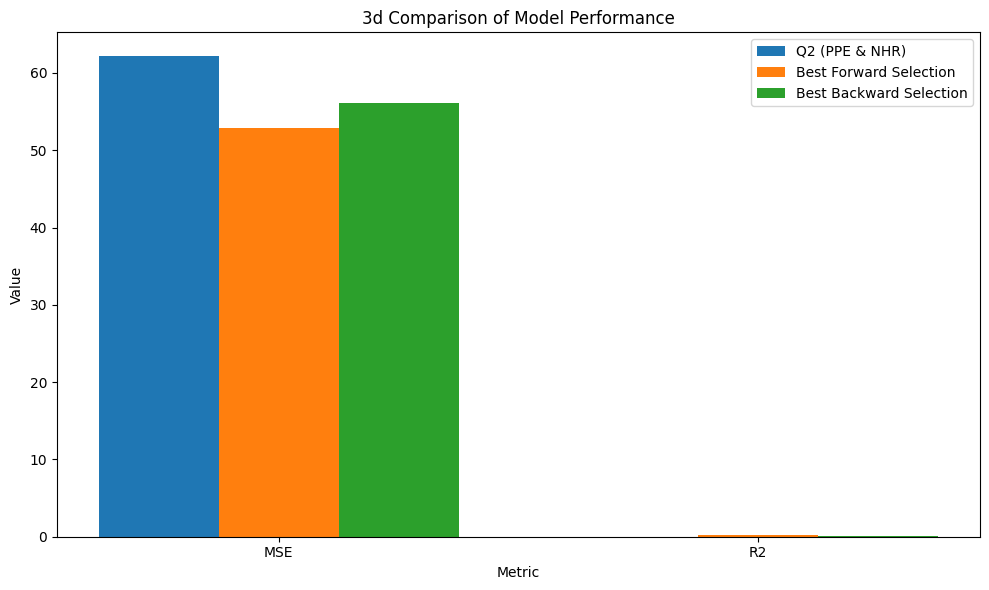

Q4 Best Model with Scaling and L2 Regularization: MSE = 63.86202040564551, R-squared = -0.0005137854673569198


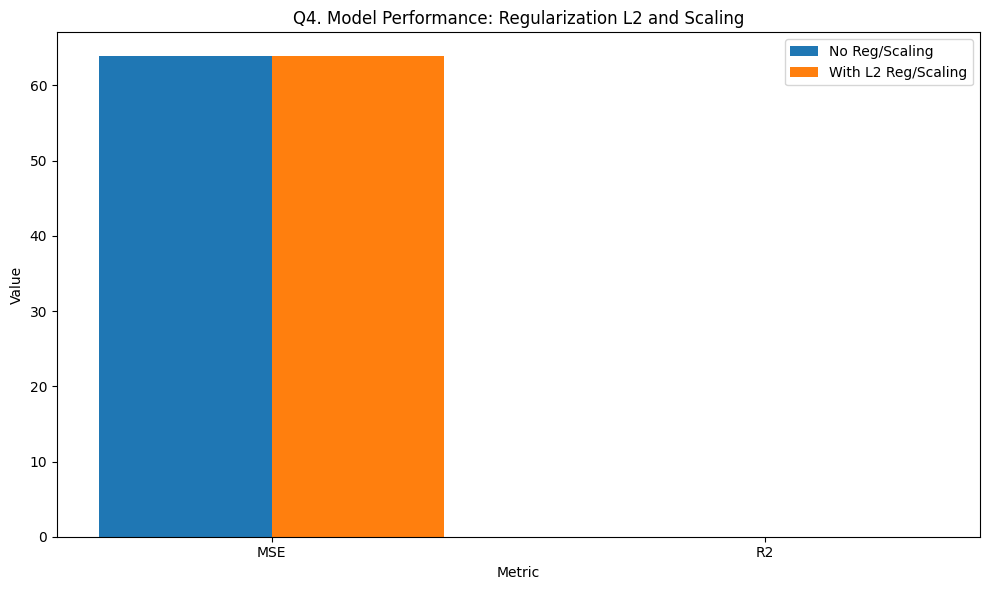

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the dataset
df = pd.read_csv("parkinsons_dataset.csv")
X = df.drop(['motor_UPDRS', 'total_UPDRS'], axis=1)  # Assuming 'total_UPDRS' is not the target
y = df['motor_UPDRS']
all_features = list(X.columns)

# Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse
# R-squared (R²)
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

# Normalize features
def normalize_features(X):
    return (X - X.mean()) / X.std()

# Adding a column of ones to X
def add_intercept(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

# Splitting the dataset
def split_data(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

# Linear Regression Class
class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, regularization=None, lambda_reg=0.1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.regularization = regularization
        self.lambda_reg = lambda_reg
        self.theta = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)
        m, n = X.shape
        self.theta = np.zeros((n + 1, 1))
        X_b = add_intercept(X)  # Add bias term

        for i in range(self.iterations):
            predictions = X_b.dot(self.theta)
            residuals = predictions - y
            gradient = X_b.T.dot(residuals) / m
            
            if self.regularization == 'l2':
                gradient[1:] += (self.lambda_reg / m) * self.theta[1:]
            elif self.regularization == 'l1':
                gradient[1:] += (self.lambda_reg / m) * np.sign(self.theta[1:])

            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        X_b = add_intercept(np.array(X))  # Add bias term
        predictions = X_b.dot(self.theta)
        return predictions.flatten()

# Evaluate model performance
def evaluate_model(y_true, y_pred):
    y_pred = y_pred.flatten()
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

# Preprocess and split the dataset
X_normalized = normalize_features(X)
X_train, X_test, y_train, y_test = split_data(X_normalized, y)

#1 Linear Regression with One Variable: "PPE"
model_1 = LinearRegression()
model_1.fit(X_train[['PPE']], y_train)
predictions_1 = model_1.predict(X_test[['PPE']]).flatten()
mse_1, r2_1 = evaluate_model(y_test.values.flatten(), predictions_1)

print(f"1. Linear Regression with One Variable PPE: MSE = {mse_1}, R-squared = {r2_1}")

#2 Linear Regression with Two Variables: "PPE" and "NHR"
model_2 = LinearRegression()
model_2.fit(X_train[['PPE', 'NHR']], y_train)
predictions_2 = model_2.predict(X_test[['PPE', 'NHR']])
mse_2, r2_2 = evaluate_model(y_test, predictions_2)

print(f"2. Linear Regression with Two Variables PPE and NHR: MSE = {mse_2}, R-squared = {r2_2}")

# Plotting performance comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions_1, alpha=0.5)
plt.title("Q1. Linear Regression Model with One Variable(PPE)")
plt.xlabel("Actual motor_UPDRS")
plt.ylabel("Predicted motor_UPDRS")

plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_2, alpha=0.5)
plt.title("Q2. Linear Regression Model with Two Variables(PPE & NHR)")
plt.xlabel("Actual motor_UPDRS")
plt.ylabel("Predicted motor_UPDRS")
plt.show()

#3a Forkward stepwise linear regression
def forward_selection(X_train, y_train, X_test, y_test, all_features):
    selected_features = []
    performance_history_mse = []
    performance_history_r2 = []

    while len(selected_features) < len(all_features):
        best_mse = float('inf')
        best_r2 = float('-inf')
        best_feature = None

        for feature in all_features:
            if feature in selected_features:
                continue  # Skip already selected features

            current_features = selected_features + [feature]
            model = LinearRegression()
            model.fit(X_train[current_features], y_train)
            predictions = model.predict(X_test[current_features])
            mse, r2 = evaluate_model(y_test, predictions)

            # Choose the best feature based on improvement in MSE or R-squared
            if mse < best_mse:
                best_mse = mse
                best_r2 = r2
                best_feature = feature

        if best_feature is None:
            break  # No improvement found

        selected_features.append(best_feature)
        performance_history_mse.append(best_mse)
        performance_history_r2.append(best_r2)
        print(f"Added {best_feature}. New MSE: {best_mse}, New R2: {best_r2}")

    return selected_features, performance_history_mse, performance_history_r2

# Adapted evaluate_model function to return both MSE and R2
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

# Assuming X_train, X_test have already been normalized and include only the features from 'all_features'
print('3a Procedding for Forward stepwise linear regression')
selected_features, mse_history, r2_history = forward_selection(X_train, y_train, X_test, y_test, all_features)

# Plotting the performance improvement for both MSE and R2
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(mse_history) + 1), mse_history, marker='o', linestyle='-', color='b')
plt.title('Q3-a. Forward Selection MSE')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(r2_history) + 1), r2_history, marker='o', linestyle='-', color='r')
plt.title('Q3-a. Forward Selection R-Square')
plt.xlabel('Number of Features')
plt.ylabel('R2 Score')
plt.grid(True)

plt.tight_layout()
plt.show()

#3b Backward stepwise linear regression
def backward_selection(X_train, y_train, X_test, y_test, all_features):
    selected_features = all_features.copy()
    performance_history_mse = []
    performance_history_r2 = []

    while len(selected_features) > 0:
        worst_mse = float('-inf')
        worst_r2 = float('inf')
        worst_feature = None

        for feature in selected_features:
            current_features = selected_features.copy()
            current_features.remove(feature)
            model = LinearRegression()
            model.fit(X_train[current_features], y_train)
            predictions = model.predict(X_test[current_features])
            mse, r2 = evaluate_model(y_test, predictions)

            if mse > worst_mse:
                worst_mse = mse
                worst_r2 = r2
                worst_feature = feature

        if worst_feature is None:
            break  # No further degradation

        selected_features.remove(worst_feature)
        performance_history_mse.append(worst_mse)
        performance_history_r2.append(worst_r2)
        print(f"Removed {worst_feature}. MSE: {worst_mse}, R2: {worst_r2}")

    return selected_features, performance_history_mse, performance_history_r2


# Perform backward elimination
print('3b Proceeding with Backward stepwise linear regression')
selected_features_bw, mse_history_bw, r2_history_bw = backward_selection(X_train, y_train, X_test, y_test, all_features)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(len(mse_history_bw), 0, -1), mse_history_bw, marker='o', linestyle='-', color='b')
plt.title('Q3b. Backward Selection MSE')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(len(r2_history_bw), 0, -1), r2_history_bw, marker='o', linestyle='-', color='r')
plt.title('Q3b. Backward Selection R-Square')
plt.xlabel('Number of Features')
plt.ylabel('R2 Score')
plt.grid(True)

plt.tight_layout()
plt.show()



#3c Compare Forward and Backward Selection
print('3c comparing Forward & Backward')
print("Forward Selection Final MSE:", mse_history_bw[-1])
print("Backward Elimination Final MSE:", mse_history_bw[-1])
print("Forward Selection Final R2:", r2_history[-1])
print("Backward Elimination Final R2:", r2_history_bw[-1])

# Visualization: Comparing the final models from forward and backward selection
# Assuming forward_selection and backward_selection have been executed
# and have returned their respective selected features and performance histories

# Plot comparison of MSE and R2 for forward vs. backward selection
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(mse_history) + 1), mse_history, label='Forward MSE', marker='o')
# Corrected from performance_history_mse[::-1] to mse_history_bw
plt.plot(range(len(mse_history_bw), 0, -1), mse_history_bw, label='Backward MSE', marker='x')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.title('3c Comparing MSE Forward vs. Backward Selection')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(r2_history) + 1), r2_history, label='Forward R2', marker='o')
# Corrected from performance_history_r2[::-1] to r2_history_bw
plt.plot(range(len(r2_history_bw), 0, -1), r2_history_bw, label='Backward R2', marker='x')
plt.xlabel('Number of Features')
plt.ylabel('R2 Score')
plt.title('3c Comparing R2 Forward vs. Backward Selection')
plt.legend()

plt.tight_layout()
plt.show()


#3d Assuming mse_2, r2_2 from Q2 and the best mse, r2 from Q3 forward and backward selections are available
print('3d Comparing Q2 with best of Q3')
metrics = ['MSE', 'R2']
values_q2 = [mse_2, r2_2]
values_best_forward = [min(mse_history), max(r2_history)]
values_best_backward = [min(mse_history_bw), max(r2_history_bw)]

index = np.arange(len(metrics))
bar_width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(index, values_q2, bar_width, label='Q2 (PPE & NHR)')
plt.bar(index + bar_width, values_best_forward, bar_width, label='Best Forward Selection')
plt.bar(index + 2*bar_width, values_best_backward, bar_width, label='Best Backward Selection')

plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('3d Comparison of Model Performance')
plt.xticks(index + bar_width, metrics)
plt.legend()

plt.tight_layout()
plt.show()


#4 Re-train and evaluate the best Q3 model with feature scaling and regularization
best_features = selected_features_bw  
# From backward elimination
X_train_scaled = normalize_features(X_train[selected_features_bw])
X_test_scaled = normalize_features(X_test[selected_features_bw])
X_train_best = X_train[selected_features_bw]
X_test_best = X_test[selected_features_bw]
# Normalize the features for the best model
X_train_best_normalized = normalize_features(X_train_best)
X_test_best_normalized = normalize_features(X_test_best)
# Reinitialize the model with regularization as needed
model_best_q3 = LinearRegression(regularization='l2', lambda_reg=0.1)  # Example with L2 regularization
model_best_q3.fit(X_train_scaled, y_train)
predictions_best_q3 = model_best_q3.predict(X_test_scaled)
mse_best_q3, r2_best_q3 = evaluate_model(y_test, predictions_best_q3)

print(f"Q4 Best Model with Scaling and L2 Regularization: MSE = {mse_best_q3}, R-squared = {r2_best_q3}")

# Train and evaluate the model without regularization and scaling
model_no_reg = LinearRegression()
model_no_reg.fit(X_train_best, y_train)  # Using non-normalized data
predictions_no_reg = model_no_reg.predict(X_test_best)
mse_no_reg, r2_no_reg = evaluate_model(y_test, predictions_no_reg)

# Train and evaluate the model with L2 regularization and feature scaling
model_reg_scaled = LinearRegression(regularization='l2', lambda_reg=0.1)
model_reg_scaled.fit(X_train_best_normalized, y_train)  # Using normalized data
predictions_reg_scaled = model_reg_scaled.predict(X_test_best_normalized)
mse_reg_scaled, r2_reg_scaled = evaluate_model(y_test, predictions_reg_scaled)

# Visualizing the results
metrics = ['MSE', 'R2']
values_no_reg = [mse_no_reg, r2_no_reg]
values_reg_scaled = [mse_reg_scaled, r2_reg_scaled]

index = np.arange(len(metrics))
bar_width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(index, values_no_reg, bar_width, label='No Reg/Scaling')
bars2 = plt.bar(index + bar_width, values_reg_scaled, bar_width, label='With L2 Reg/Scaling')

plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Q4. Model Performance: Regularization L2 and Scaling')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()

plt.tight_layout()
plt.show()
